<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/job_a_thon_january_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict CLTV of a customer

Can you help the company identify the most potential customers?



## Problem Statement


VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurances at best prices with 24/7 claim settlement.  It offers different types of policies for  both personal and commercial vehicles. It has established its brand across different regions in India. 

Around 90% of the businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at doorstep, etc. Inorder to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).

Inorder to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, as a part of this challenge, your task at hand is to build a high performance and interpretable machine learning model to predict the CLTV based on the user and policy data.


## About the Dataset

You are provided with the sample dataset of the company holding the information of customers and policy such as highest qualification of the user, total income earned by a customer in a year, employee status,  policy opted by the user, type of policy and so on and the target variable indicating the total customer lifetime value.


## Data Dictionary

You are provided with 3 files - train.csv, test.csv and sample_submission.csv

## Train Set

You are provided with around 90K records containing the attributes of the user and policy and the target variable cltv indicating the total customer lifetime value.

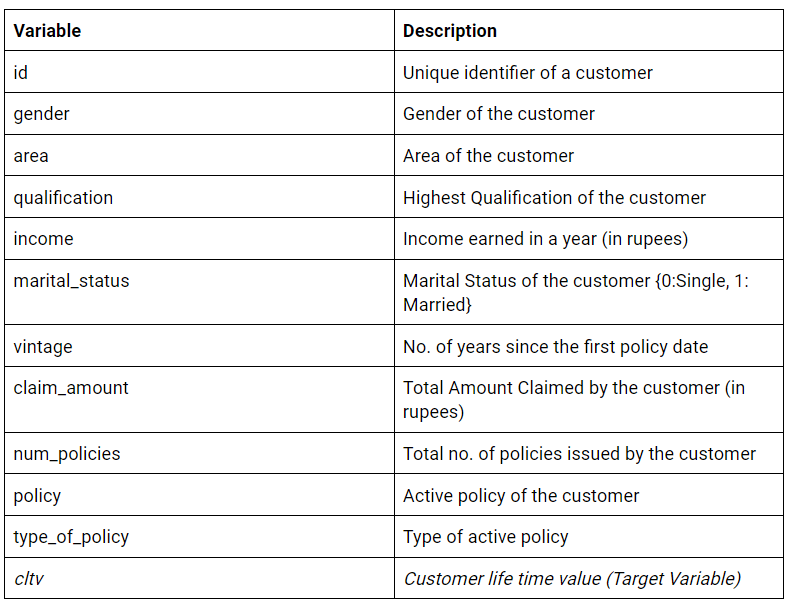


## Test Set

You are provided with around 60K records containing only the attributes of the user and policy and you need to predict the target variable cltv indicating the total customer lifetime value.

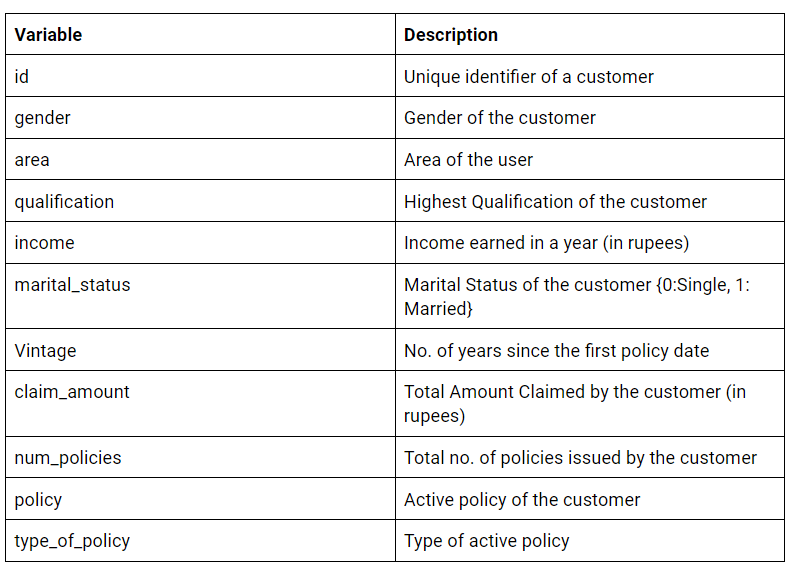


## Submission File Format

The solution file must contain the format similar to that of sample submission. sample_submission.csv contains 2 variables - id and cltv. 

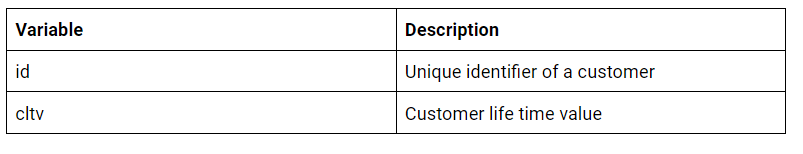

## Evaluation metric

The evaluation metric for this hackathon would be r2_score.



In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## AutoML using pycaret

In [4]:
! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requir

In [5]:
!pip install -U xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [6]:
!pip install -U catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

# Import libraries for visualization and set default values.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])

from sklearn import set_config
set_config(display='text')

In [2]:
from pycaret.regression import *

# Confirm Pycaret version is 2.1
from pycaret.utils import version
print('Confirm Pycaret version is 2.1.X?')
print('Pycaret Version: ', version())

Confirm Pycaret version is 2.1.X?
Pycaret Version:  2.3.10


## Load Dataset

In [38]:
train = pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/Jobathon_jan_2023/train_BRCpofr.csv")
test = pd.read_csv("/content/drive/MyDrive/AV_JOB_HACKATHON_2/Jobathon_jan_2023/test_koRSKBP.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [5]:
# Check shape of dataset and view first few observations to ensure data loaded correctly.
print("Shape of train dataset (observations, features):", train.shape)
train.head(5).round(2)

Shape of train dataset (observations, features): (89392, 12)


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [6]:
# Check shape of dataset and view first few observations to ensure data loaded correctly.
print("Shape of test dataset (observations, features):", test.shape)
test.head(5).round(2)

Shape of test dataset (observations, features): (59595, 11)


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [7]:
# Describe the features in the dataset, such as, count, mean, standard deviation, min, max, etc.
train.describe(include='all').round(2)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.00,89392,89392,89392,89392,89392.00,89392.00,89392.00,89392,89392,89392,89392.00
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.50,NaN,NaN,NaN,NaN,0.58,4.60,4351.50,NaN,NaN,NaN,97952.83
std,25805.39,NaN,NaN,NaN,NaN,0.49,2.29,3262.36,NaN,NaN,NaN,90613.81
min,1.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,NaN,24828.00
25%,22348.75,NaN,NaN,NaN,NaN,0.00,3.00,2406.00,NaN,NaN,NaN,52836.00
50%,44696.50,NaN,NaN,NaN,NaN,1.00,5.00,4089.00,NaN,NaN,NaN,66396.00
75%,67044.25,NaN,NaN,NaN,NaN,1.00,6.00,6094.00,NaN,NaN,NaN,103440.00


In [8]:
test.describe(include='all').round(2)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
count,59595.00,59595,59595,59595,59595,59595.00,59595.00,59595.00,59595,59595,59595
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum
freq,NaN,33641,41441,30835,35088,NaN,NaN,NaN,40308,37871,31908
mean,119190.00,NaN,NaN,NaN,NaN,0.58,4.62,4368.50,NaN,NaN,NaN
std,17203.74,NaN,NaN,NaN,NaN,0.49,2.28,3288.13,NaN,NaN,NaN
min,89393.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,NaN
25%,104291.50,NaN,NaN,NaN,NaN,0.00,3.00,2398.00,NaN,NaN,NaN
50%,119190.00,NaN,NaN,NaN,NaN,1.00,5.00,4106.00,NaN,NaN,NaN
75%,134088.50,NaN,NaN,NaN,NaN,1.00,6.00,6104.00,NaN,NaN,NaN


## Data Visualization

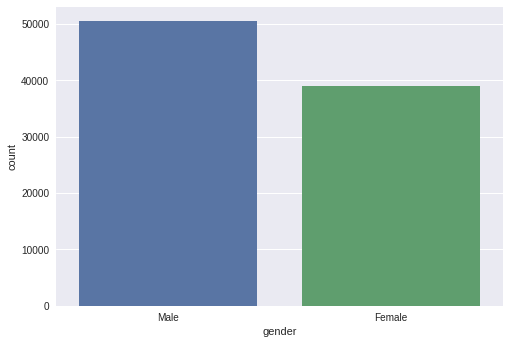

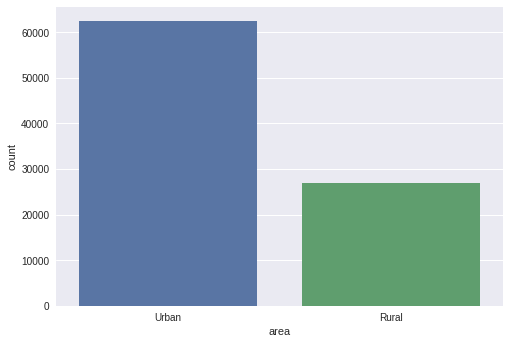

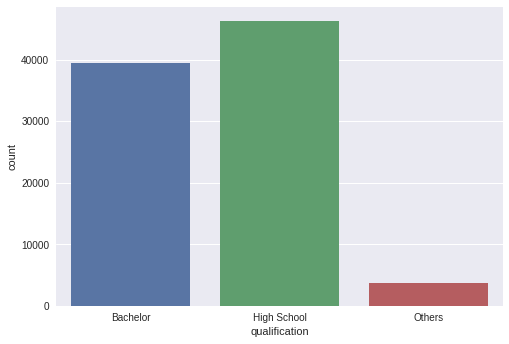

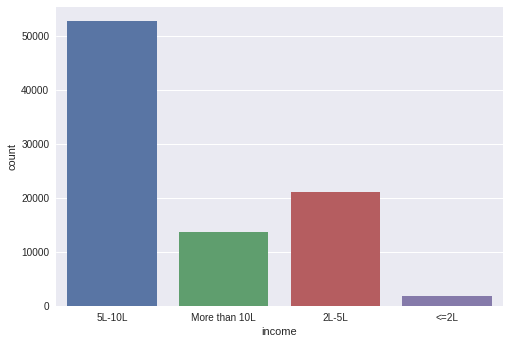

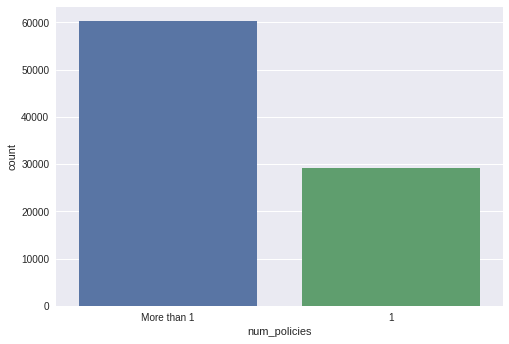

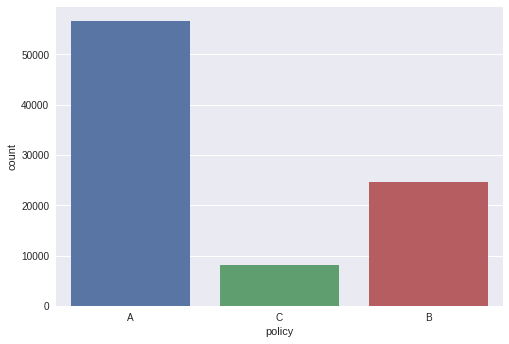

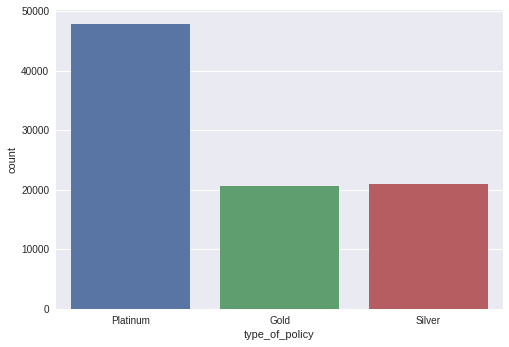

In [ ]:
for col in train.columns.tolist():
  if train[col].dtypes == 'object':
    sns.countplot(x=col,data=train)
    plt.show()

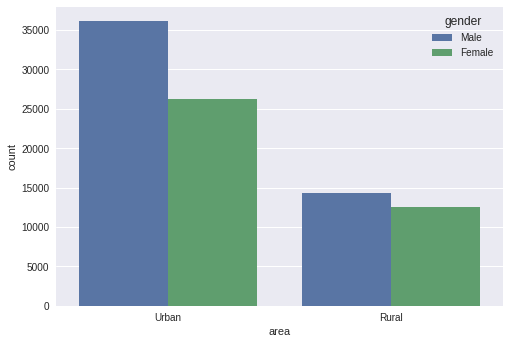

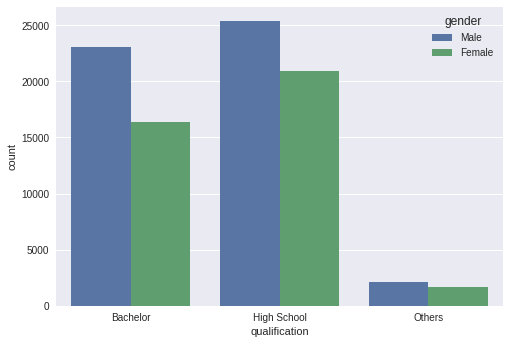

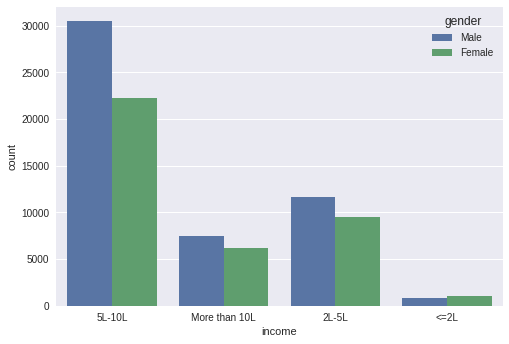

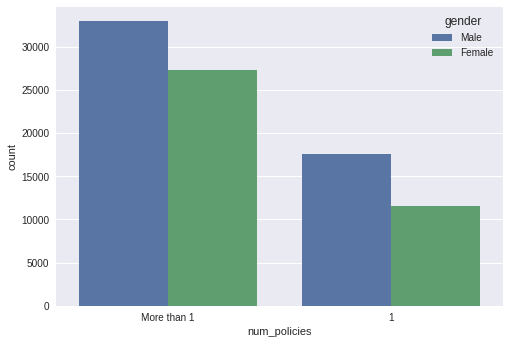

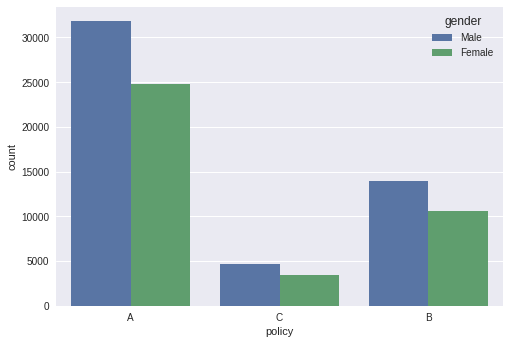

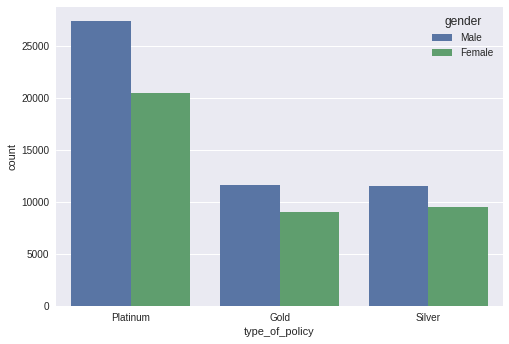

In [ ]:
for col in train.columns.tolist():
  if train[col].dtypes == 'object' and col != 'gender':
    sns.countplot(x=col,data=train,hue='gender')
    plt.show()

## Check for missing values if any

In [9]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [10]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

## Conduct Regression Model in Pycaret

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [39]:
train_dataset = train.drop('id',axis=1)
test_dataset = test.drop('id',axis=1)

In [ ]:
# Transform dataset (transform, bin and create dummy variables) and split the dataset. In addition, we are logging experiments and plots for those experiment to be viewed later with MLflow. 
reg_fcr = setup(data=train_dataset, 
                target='cltv', 
                session_id=786, 
                transformation=True,
                normalize=False, 
                train_size=0.75, numeric_features=('marital_status','vintage')
               )

,Description,Value
0,session_id,786
1,Target,cltv
2,Original Data,"(89392, 11)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(67044, 19)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['marital_status',
                                                          'vintage'],
                                      target='cltv', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerica...
                                                  random_state_quantile=786,
                                                  target='cltv')),
                ('binn', 'passthrough'), (

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# We can do a compare_models() function without assigning it to a variable. However, we have top 5 models selected using n_select and assigning it to top5 variable. We plan to use this for Stacking and Blending purposes. We have excluded 'RANSAC' (Random Sample Consensus) and 'KNN' (K-Nearest Neighbor) models and have adjusted the default fold value from 10 to 5. 
top5 = compare_models(n_select=5, include=(['lr','rf','xgboost','lightgbm','catboost','dummy']), sort='R2', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,50553.8381,6.934195e+09,83258.2700,0.1540,0.5667,0.5468,0.494
lr,Linear Regression,51710.4459,6.979961e+09,83531.5504,0.1485,0.5864,0.5702,0.532
catboost,CatBoost Regressor,51014.8803,7.009880e+09,83710.8024,0.1448,0.5749,0.5530,8.438
rf,Random Forest Regressor,55701.5654,7.897820e+09,88860.1630,0.0362,0.6211,0.6235,14.494
dummy,Dummy Regressor,57420.3891,8.197629e+09,90525.6069,-0.0001,0.6981,0.7440,0.036


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 2
INFO:logs:[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=786, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), <catboost.core.CatBoostRegressor object at 0x7fb8eb8ab2b0>, RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
        

In [ ]:
# Sometimes you want to include the output of the compare_models() as a screenshot into a report. However, with the yellow highlights it gets difficult to read. Pycaret has thought of that and you can use the pull() function to show the model results in the sort by or ascending order.
pull().sort_values(by='R2', ascending=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,57420.3891,8.197629e+09,90525.6069,-0.0001,0.6981,0.7440,0.036
rf,Random Forest Regressor,55701.5654,7.897820e+09,88860.1630,0.0362,0.6211,0.6235,14.494
catboost,CatBoost Regressor,51014.8803,7.009880e+09,83710.8024,0.1448,0.5749,0.5530,8.438
lr,Linear Regression,51710.4459,6.979961e+09,83531.5504,0.1485,0.5864,0.5702,0.532
lightgbm,Light Gradient Boosting Machine,50553.8381,6.934195e+09,83258.2700,0.1540,0.5667,0.5468,0.494


In [ ]:
# We can tune our top 5 models dynamically with a higher iteration rate (n_iter) to find more optimal hyper parameters over a larger search space. 
tuned_top5 = [tune_model(i, n_iter=100, optimize='R2', fold=5) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51506.4212,7.335403e+09,85646.9695,0.1583,0.5701,0.5474
1,50333.6242,6.804242e+09,82487.8316,0.1612,0.5633,0.5474
2,49995.2479,6.637929e+09,81473.4847,0.1612,0.5634,0.5483
3,49771.2496,6.680920e+09,81736.8942,0.1558,0.5636,0.5480
4,50673.3243,6.977348e+09,83530.5220,0.1624,0.5646,0.5443
Mean,50455.9734,6.887168e+09,82975.1404,0.1598,0.5650,0.5471
Std,607.7444,2.532124e+08,1514.7813,0.0024,0.0026,0.0014


INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 5
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7fb8eb9c38b0>
INFO:logs:tune_model() succesfully completed......................................
INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=786, verbose=0, warm_start=False), fold=5, round=4, n_iter=100, custom_grid=None, optimize=R2, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:53:15
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Random Forest Regressor
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
# Blending models is an ensemble method of combining different machine learning algorithms and use a majority vote to build consensus of final prediction values. Let's try building a blending model from our top 5 models and evaluate the results. 
blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='R2', choose_better=False)

In [ ]:
# Below is a view of the model parameters. 
blender_specific

In [ ]:
# Stacking models is an ensemble method of using meta learning, where a meta model is created using multiple base estimators to generate the final prediction. Let's try building a stacking model from our top 5 models and evaluate the results. 
stacker_specific = stack_models(estimator_list=tuned_top5[1:], meta_model=tuned_top5[0], fold=5, optimize='RMSE', choose_better=False)

In [ ]:
# Below is a view of the model parameters. 
stacker_specific

## CatboostRegressor

Running 1 iteration for depth 3
R2 Score : 0.16145551402285496 for split 1
R2 Score : 0.15834301901863346 for split 2
R2 Score : 0.16046702552712622 for split 3
R2 Score : 0.15877184113735432 for split 4
R2 Score : 0.16194207139008454 for split 5
Running 2 iteration for depth 3
R2 Score : 0.1624585077166425 for split 1
R2 Score : 0.15879557698661373 for split 2
R2 Score : 0.16374427169246253 for split 3
R2 Score : 0.15735080232866094 for split 4
R2 Score : 0.158358883984976 for split 5
Running 3 iteration for depth 3
R2 Score : 0.1576837548088682 for split 1
R2 Score : 0.16433049195393157 for split 2
R2 Score : 0.1543659732880731 for split 3
R2 Score : 0.15982004222906854 for split 4
R2 Score : 0.16281993371895276 for split 5
Running 4 iteration for depth 3
R2 Score : 0.1625810385418417 for split 1
R2 Score : 0.16009478922470866 for split 2
R2 Score : 0.1587244890205891 for split 3
R2 Score : 0.15793465855418676 for split 4
R2 Score : 0.16282668473784734 for split 5
Running 5 iteration

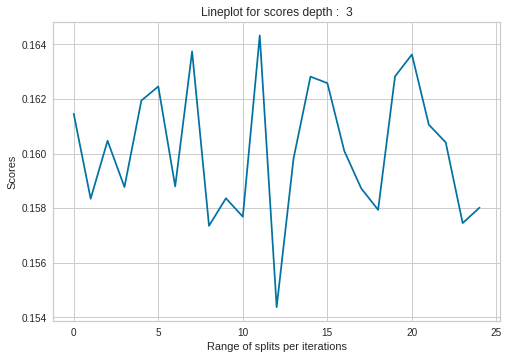

 min score : 0.1543659732880731,max_score : 0.16433049195393157,average_score :0.16013727956489843
Running 1 iteration for depth 5
R2 Score : 0.1574046559895419 for split 1
R2 Score : 0.15758462457692712 for split 2
R2 Score : 0.1554164189278453 for split 3
R2 Score : 0.15860277147099233 for split 4
R2 Score : 0.16836810553543702 for split 5
Running 2 iteration for depth 5
R2 Score : 0.16088456550606445 for split 1
R2 Score : 0.1548586716288517 for split 2
R2 Score : 0.15592426141711435 for split 3
R2 Score : 0.16255159668655828 for split 4
R2 Score : 0.1626054610370059 for split 5
Running 3 iteration for depth 5
R2 Score : 0.16057874150409757 for split 1
R2 Score : 0.15749570879121944 for split 2
R2 Score : 0.16000191609150372 for split 3
R2 Score : 0.15695749297964856 for split 4
R2 Score : 0.15977099007631923 for split 5
Running 4 iteration for depth 5
R2 Score : 0.1591586834050963 for split 1
R2 Score : 0.1603633006229418 for split 2
R2 Score : 0.1562633923386858 for split 3
R2 Sco

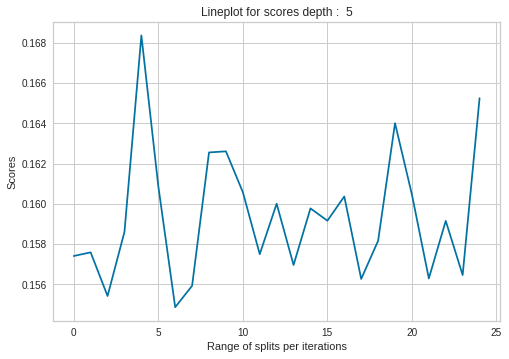

 min score : 0.1548586716288517,max_score : 0.16836810553543702,average_score :0.15938219240192475
Running 1 iteration for depth 7
R2 Score : 0.158112472738012 for split 1
R2 Score : 0.157595905105398 for split 2
R2 Score : 0.154617228453365 for split 3
R2 Score : 0.15811890283917085 for split 4
R2 Score : 0.15533009260011843 for split 5
Running 2 iteration for depth 7
R2 Score : 0.1530220769926156 for split 1
R2 Score : 0.15611667550953734 for split 2
R2 Score : 0.15157266582202267 for split 3
R2 Score : 0.15968490467353114 for split 4
R2 Score : 0.1599465520780684 for split 5
Running 3 iteration for depth 7
R2 Score : 0.15600723689274354 for split 1
R2 Score : 0.15401826812010289 for split 2
R2 Score : 0.15584555995996885 for split 3
R2 Score : 0.15546405202845182 for split 4
R2 Score : 0.16164165095033856 for split 5
Running 4 iteration for depth 7
R2 Score : 0.16087164647795638 for split 1
R2 Score : 0.15492100151485277 for split 2
R2 Score : 0.14945013322017664 for split 3
R2 Scor

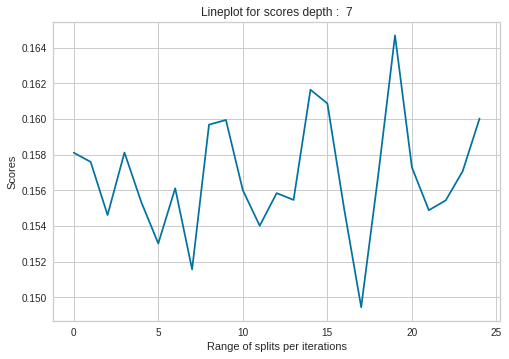

 min score : 0.14945013322017664,max_score : 0.16468738129059712,average_score :0.15674171851307603
Running 1 iteration for depth 10
R2 Score : 0.1443210197287601 for split 1
R2 Score : 0.13567345856407553 for split 2
R2 Score : 0.13891184206437113 for split 3
R2 Score : 0.13922434283187035 for split 4
R2 Score : 0.14933430824116478 for split 5
Running 2 iteration for depth 10
R2 Score : 0.139862204062828 for split 1
R2 Score : 0.13738328474141281 for split 2
R2 Score : 0.13962936482052446 for split 3
R2 Score : 0.14472108674457496 for split 4
R2 Score : 0.14558462381236092 for split 5
Running 3 iteration for depth 10
R2 Score : 0.14088589998203072 for split 1
R2 Score : 0.13905022449977966 for split 2
R2 Score : 0.13786779069811472 for split 3
R2 Score : 0.1411266559556612 for split 4
R2 Score : 0.145308385197375 for split 5
Running 4 iteration for depth 10
R2 Score : 0.13831734322737088 for split 1
R2 Score : 0.13594736499174043 for split 2
R2 Score : 0.13934899349473107 for split 3


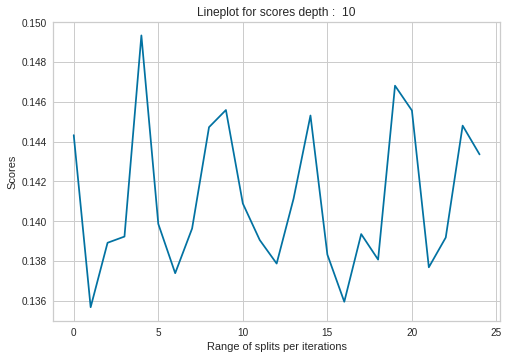

 min score : 0.13567345856407553,max_score : 0.14933430824116478,average_score :0.14111758678759206


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
X = train_dataset.drop('cltv',axis=1)
Y = train_dataset['cltv']
for depth in [3,5,7,10]:
  iterations = 5
  scores = []
  scores_val = []
  target = Y
  temp = X
  predictions = []
  for i in range(iterations):
    print(f'Running {i+1} iteration for depth {depth}')
    
    kfold = StratifiedKFold(n_splits = 5, shuffle=True)
    split = 0
    for train_index,test_index in kfold.split(temp,target):
      split = split +1
      xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
      ytrain,ytest = target[train_index],target[test_index]
      model = CatBoostRegressor(max_depth=depth,
                                   random_state=60,
                                   eval_metric='R2',
                                   num_boost_round=1000,verbose=0)
      model.fit(xtrain,ytrain,cat_features=['gender','area','qualification','income','num_policies','policy', 'type_of_policy'])
            
      preds = model.predict(xtest)
        
      print(f"R2 Score : {r2_score(ytest,preds)} for split {split}")
      scores.append(r2_score(ytest,preds))
      #
#
#        
  print('-----------KFOLD--------------')
  print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
  plt.title(f"Lineplot for scores depth :  {depth}")
  plt.xlabel('Range of splits per iterations')
  plt.ylabel('Scores')
  plt.show()
  print(f" min score : {min(scores)},max_score : {max(scores)},average_score :{np.mean(scores)}")
     

* From the Crossvalidation results above depth =3 has the best R2 score

In [41]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
X = train_dataset.drop('cltv',axis=1)
Y = train_dataset['cltv']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=42)
#
model = CatBoostRegressor(max_depth=3,
                          random_state=60,
                          eval_metric='R2',
                          num_boost_round=3500,
                          verbose=0)
#
model.fit(X_train,y_train,cat_features=['gender','area','qualification','income','num_policies','policy', 'type_of_policy'])
#
y_pred = model.predict(X_test)

In [42]:
print(f"R2 Score : {r2_score(y_test,y_pred)}")

R2 Score : 0.16196309323919067


In [54]:
model = CatBoostRegressor(max_depth=3,
                          random_state=60,
                          eval_metric='R2',
                          num_boost_round=5000,
                          verbose=0)

In [55]:
model.fit(X,Y,cat_features=['gender','area','qualification','income','num_policies','policy', 'type_of_policy'])

## Make Predictions

In [56]:
y_pred =model.predict(test_dataset)

In [57]:
#creating the sample submission file
sample_submission = test[['id']]
sample_submission['cltv'] = y_pred
sample_submission.to_csv("sample_catboostregressor_5000.csv",index=False)

## Submission Scores
n_estimator =1000

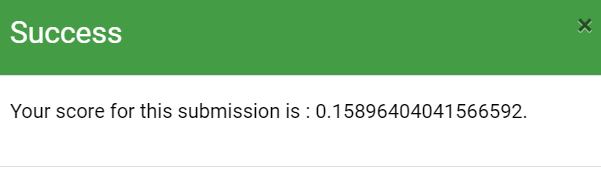


n_estimator = 2000

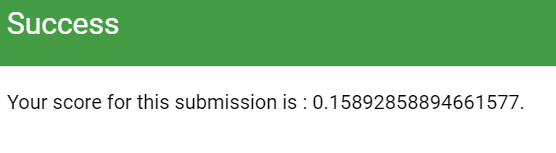

## n_iterations = 3500
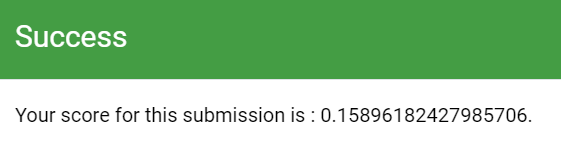

n_estimator = 500

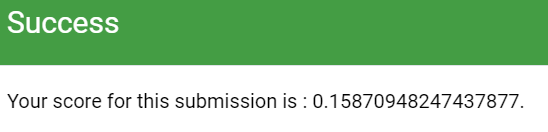

n_estimator =5000

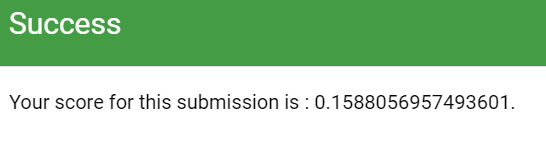

## LightGBM regressor

In [13]:
for col in ['gender','area','qualification','income','num_policies','policy', 'type_of_policy']:
  print(train_dataset[col].unique())

['Male' 'Female']
['Urban' 'Rural']
['Bachelor' 'High School' 'Others']
['5L-10L' 'More than 10L' '2L-5L' '<=2L']
['More than 1' '1']
['A' 'C' 'B']
['Platinum' 'Gold' 'Silver']


## Label encoding

In [14]:
gender_enc = {k:v for v,k in enumerate(train_dataset['gender'].unique())}
gender_enc

{'Male': 0, 'Female': 1}

In [15]:
area_enc = {k:v for v,k in enumerate(train_dataset['area'].unique())}
area_enc

{'Urban': 0, 'Rural': 1}

In [16]:
qual_enc = {k:v for v,k in enumerate(train_dataset['qualification'].unique())}
qual_enc

{'Bachelor': 0, 'High School': 1, 'Others': 2}

In [17]:
income_enc = {k:v for v,k in enumerate(train_dataset['income'].unique())}
income_enc

{'5L-10L': 0, 'More than 10L': 1, '2L-5L': 2, '<=2L': 3}

In [18]:
nump_enc = {k:v for v,k in enumerate(train_dataset['num_policies'].unique())}
nump_enc

{'More than 1': 0, '1': 1}

In [20]:
p_enc = {k:v for v,k in enumerate(train_dataset['policy'].unique())}
p_enc

{'A': 0, 'C': 1, 'B': 2}

In [21]:
ptype_enc = {k:v for v,k in enumerate(train_dataset['type_of_policy'].unique())}
ptype_enc

{'Platinum': 0, 'Gold': 1, 'Silver': 2}

## Convert cartegorical variables in to variables having ordinal values

In [22]:
train_dataset['gender'] = train_dataset['gender'].map(gender_enc)
train_dataset['area'] = train_dataset['area'].map(area_enc)
train_dataset['qualification'] = train_dataset['qualification'].map(qual_enc)
train_dataset['income'] = train_dataset['income'].map(income_enc)
train_dataset['num_policies'] = train_dataset['num_policies'].map(nump_enc)
train_dataset['policy'] = train_dataset['policy'].map(p_enc)
train_dataset['type_of_policy'] = train_dataset['type_of_policy'].map(ptype_enc)

In [23]:
train_dataset.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,0,0,0,0,1,5,5790,0,0,0,64308
1,0,1,1,0,0,8,5080,0,0,0,515400
2,0,0,0,0,1,8,2599,0,0,0,64212
3,1,1,1,0,0,7,0,0,0,0,97920
4,0,0,1,1,1,6,3508,0,0,1,59736


In [24]:
test_dataset['gender'] = test_dataset['gender'].map(gender_enc)
test_dataset['area'] = test_dataset['area'].map(area_enc)
test_dataset['qualification'] = test_dataset['qualification'].map(qual_enc)
test_dataset['income'] = test_dataset['income'].map(income_enc)
test_dataset['num_policies'] = test_dataset['num_policies'].map(nump_enc)
test_dataset['policy'] = test_dataset['policy'].map(p_enc)
test_dataset['type_of_policy'] = test_dataset['type_of_policy'].map(ptype_enc)

In [25]:
test_dataset.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,1,1,0,0,6,2134,0,2,2
1,1,0,1,2,0,4,4102,0,0,0
2,0,1,1,0,1,7,2925,0,2,1
3,1,1,0,1,1,2,0,0,2,2
4,1,0,1,2,0,5,14059,0,2,2


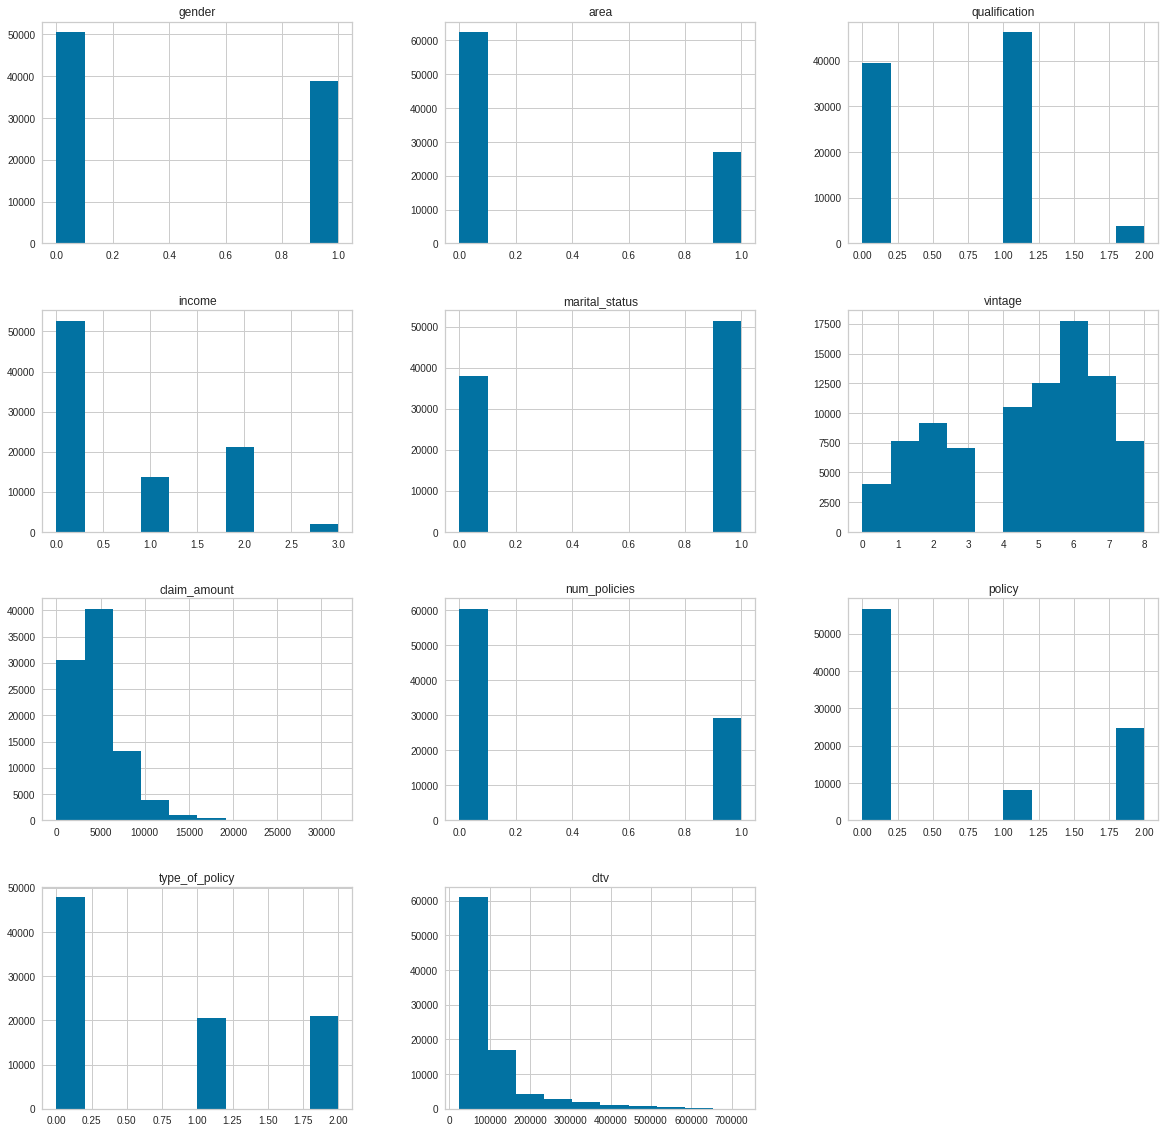

In [26]:
train_dataset.hist(figsize = (20,20))
plt.show()

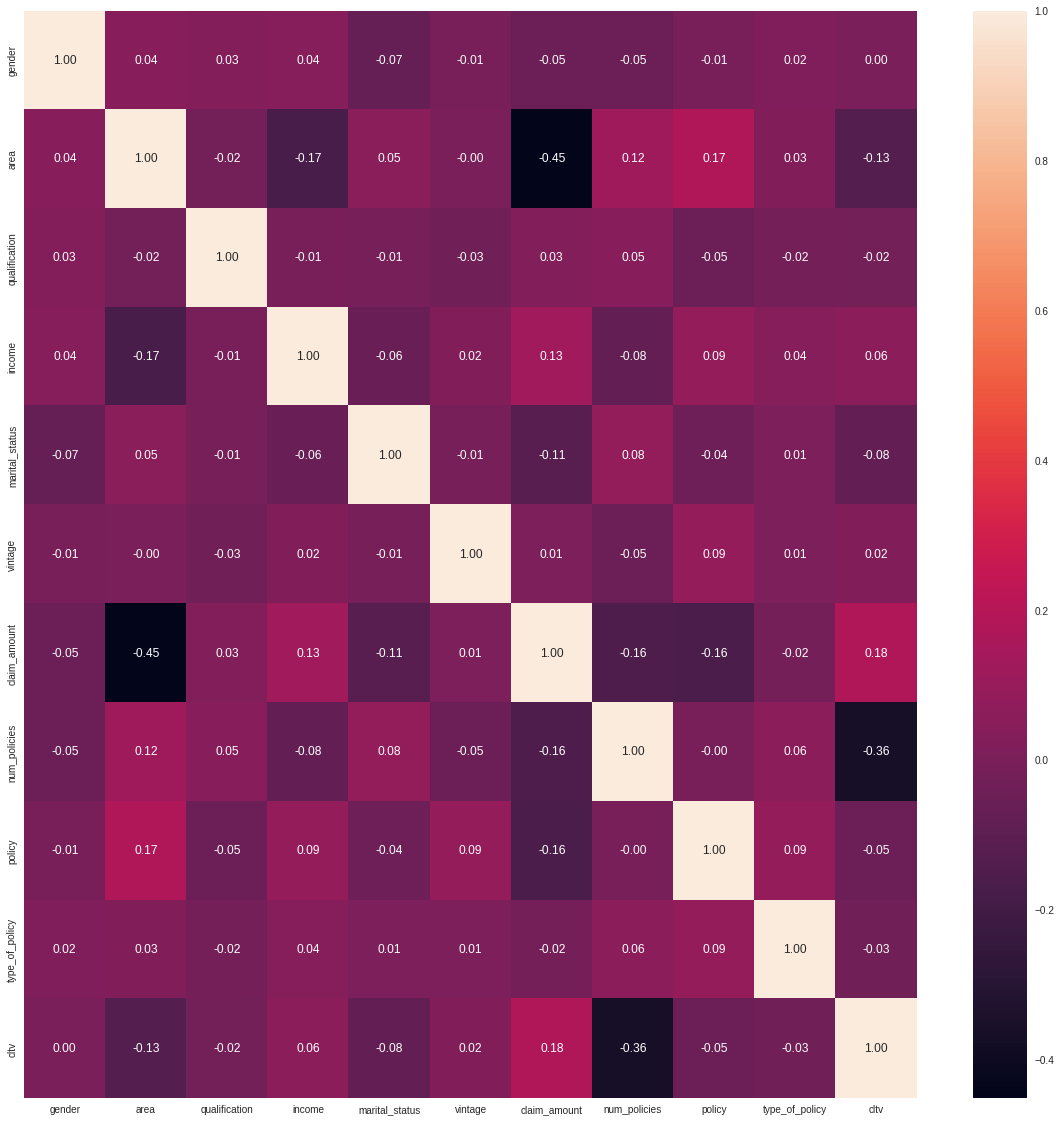

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(train_dataset.corr(),annot=True,fmt=".2f")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X = train_dataset.drop('cltv',axis=1)
Y = train_dataset['cltv']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=X['gender'])

In [30]:
import lightgbm as lgb
from sklearn.metrics import r2_score
# Create LightGBM Regressor
lgb_reg = lgb.LGBMRegressor(objective='regression', learning_rate=0.1, n_estimators=100)

# Fit model to training data
lgb_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = lgb_reg.predict(X_test)

# Calculate mean squared error
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)	

R2 Score:  0.15949316134207525


Running 1 iteration
0.15692352957715172
0.1550563605539902
Running 2 iteration
0.15554839707886503
0.15443490641924862
Running 3 iteration
0.152823587572684
0.152881813507026
Running 4 iteration
0.15400723524752913
0.15259893088563836
Running 5 iteration
0.150624245502048
0.15696420209038775
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.150624245502048 0.15696420209038775 0.1541863208434569


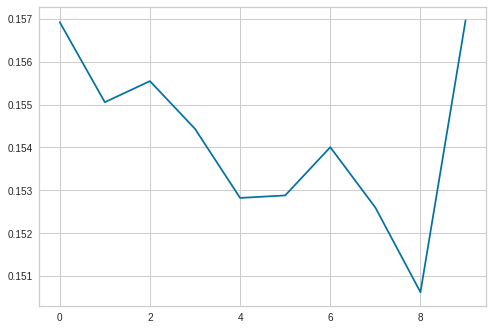

In [33]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
         
        model = lgb.LGBMRegressor(objective='regression', learning_rate=0.1, n_estimators=100)
        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(r2_score(ytest,preds))
        scores.append(r2_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Create LightGBM regressor
lgbm = lgb.LGBMRegressor()

# Create grid search
grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit grid search to data
grid_search.fit(X, Y)

# Print best parameters
print("Best parameters: ", grid_search.best_params_)

# Print best score
print("Best score: ", grid_search.best_score_)


Best parameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.6}
Best score:  0.15968945126675121


In [36]:
pred = grid_search.best_estimator_.predict(test_dataset)

In [37]:
#creating the sample submission file
sample_submission = test[['id']]
sample_submission['cltv'] = pred
sample_submission.to_csv("sample_submission_lightgbmregressor.csv",index=False)

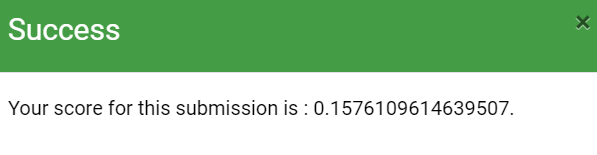